In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [3]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential([
    keras.Input(shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Dropout(rate=0.2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0

In [5]:
model.compile(optimizer= keras.optimizers.Adam(),
             loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics= ["accuracy"])

In [6]:
history = model.fit(X_train, y_train, batch_size=32, validation_split=0.15, epochs=40, verbose=2)

Epoch 1/40
1329/1329 - 13s - loss: 1.6533 - accuracy: 0.3861 - val_loss: 1.4061 - val_accuracy: 0.4883
Epoch 2/40
1329/1329 - 6s - loss: 1.2539 - accuracy: 0.5516 - val_loss: 1.1344 - val_accuracy: 0.5940
Epoch 3/40
1329/1329 - 6s - loss: 1.1012 - accuracy: 0.6106 - val_loss: 1.0350 - val_accuracy: 0.6368
Epoch 4/40
1329/1329 - 6s - loss: 1.0060 - accuracy: 0.6451 - val_loss: 0.9628 - val_accuracy: 0.6679
Epoch 5/40
1329/1329 - 6s - loss: 0.9333 - accuracy: 0.6704 - val_loss: 0.9263 - val_accuracy: 0.6784
Epoch 6/40
1329/1329 - 6s - loss: 0.8751 - accuracy: 0.6938 - val_loss: 0.9102 - val_accuracy: 0.6848
Epoch 7/40
1329/1329 - 6s - loss: 0.8289 - accuracy: 0.7090 - val_loss: 0.8895 - val_accuracy: 0.6948
Epoch 8/40
1329/1329 - 6s - loss: 0.7976 - accuracy: 0.7223 - val_loss: 0.8538 - val_accuracy: 0.7116
Epoch 9/40
1329/1329 - 7s - loss: 0.7611 - accuracy: 0.7344 - val_loss: 0.8946 - val_accuracy: 0.6868
Epoch 10/40
1329/1329 - 6s - loss: 0.7333 - accuracy: 0.7414 - val_loss: 0.8195 -

In [7]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8813 - accuracy: 0.7309


[0.8813493847846985, 0.73089998960495]

In [8]:
for keys in history.history.keys():
    print(keys)

loss
accuracy
val_loss
val_accuracy


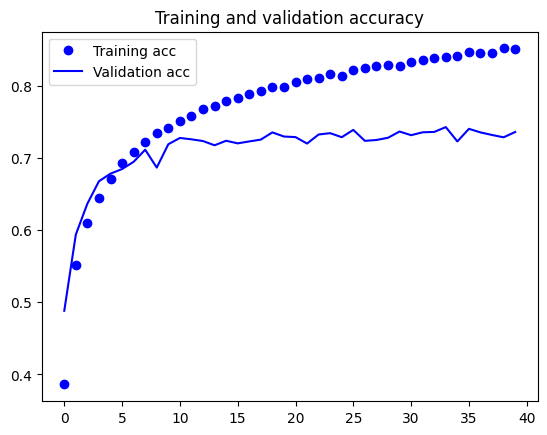

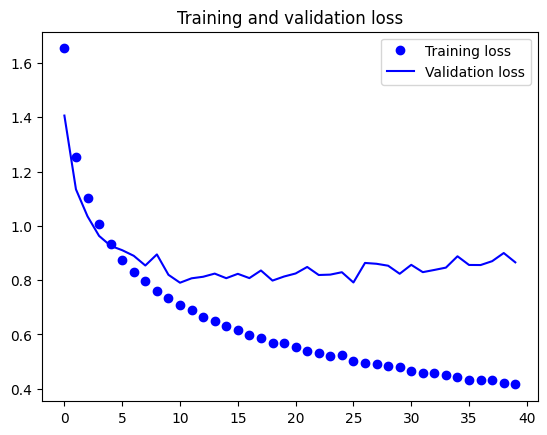

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()